In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
student_scores = pd.read_csv('datasets/student_performance.csv')

student_scores.sample(5)

,Hours Studied,Score Obtained,Outliers
6,68,1.500874,False
93,840,99.381854,False
14,110,80.000000,True
116,958,12.000000,True
91,830,99.303591,False


In [3]:
student_scores.shape

(122, 3)

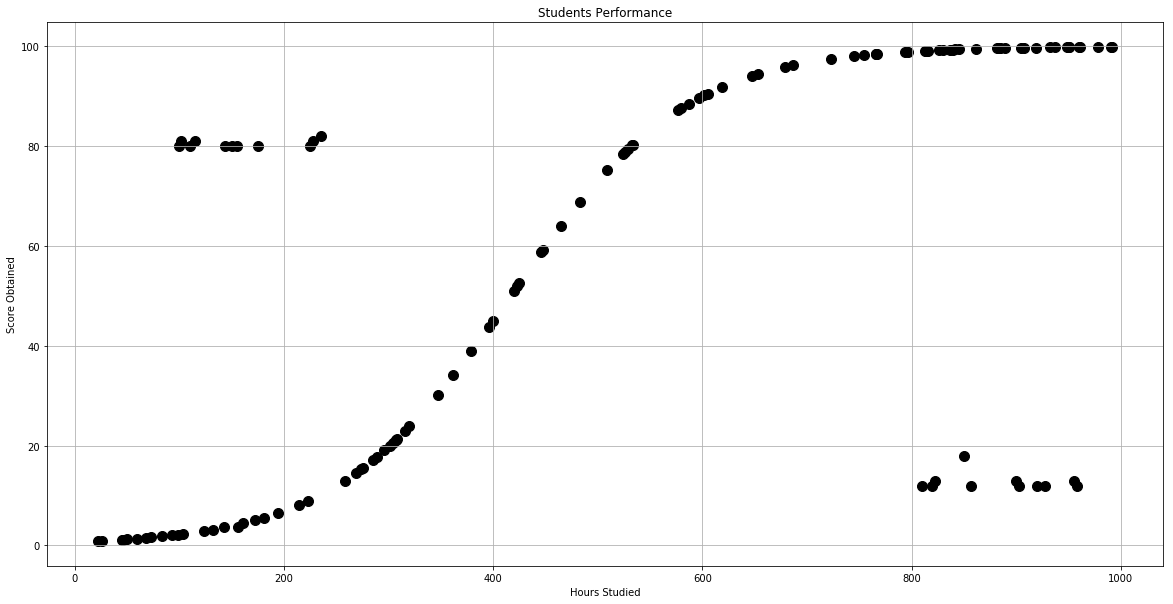

In [4]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.scatter(student_scores['Hours Studied'], 
            student_scores['Score Obtained'], 
            color='black', 
            s=100)

ax.set(xlabel='Hours Studied', 
       ylabel='Score Obtained',
       title='Students Performance')

ax.grid()

plt.show()

In [5]:
student_scores.groupby('Outliers').size()

Outliers
False    100
True      22
dtype: int64

In [6]:
X = student_scores.drop('Outliers', axis=1)

X.head()

,Hours Studied,Score Obtained
0,22,0.869736
1,26,0.912112
2,45,1.143020
3,46,1.156660
4,50,1.212843


# Outlier Detection
https://scikit-learn.org/stable/modules/outlier_detection.html

### 1. LocalOutlierFactor
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html


The neighbors.LocalOutlierFactor (LOF) algorithm computes a score (called local outlier factor) reflecting the degree of abnormality of the observations. It measures the local density deviation of a given data point with respect to its neighbors. The idea is to detect the samples that have a substantially lower density than their neighbors.

LocalOutlierFactor is an Unsupervised learning Algorithm for outlier detection - associates an anomaly score for each sample called the Local Outlier Factor

In [8]:
from sklearn.neighbors import LocalOutlierFactor

Here we are using contamination=0.2 (proportion of outliers in the dataset) since there are a toal total 22 outliers out of 122 which is about 19%

Instantiate the LocalOutlierFactor Estimate object which works by calculating the local density for a data point, for each data point it then measures the Local deviation of density of each sample with respect to its neighbours -- determines how isolated a sample is...

The contamination factor which refers to the proportion of outliers in the dataset, when specified, this determines the threshold of the decision function

In [9]:
lof = LocalOutlierFactor(n_neighbors=20, 
                         contamination=0.2) # Use 0.2 because 20% of the Data are Outliers

In [10]:
y_pred = lof.fit_predict(X)

y_pred

# Inline factors are `1` outlier factors are `-1`

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1])

In [11]:
n_outliers = (y_pred == -1).sum()

n_outliers

25

### Ploting Inliers and Outliers
##### Blue_color_points = Inliers 
##### Red_color_points = Outliers

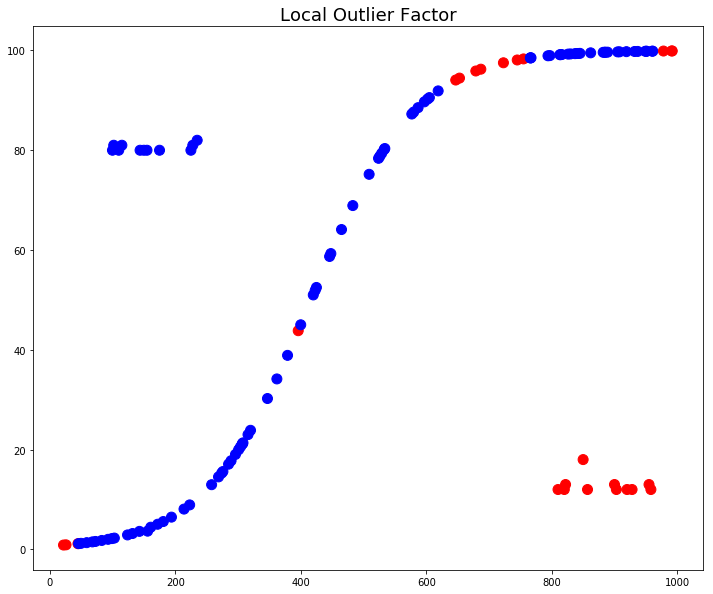

In [12]:
colors = np.array(['r', 'b'])

plt.figure(figsize=(12, 10))

plt.title('Local Outlier Factor', size=18)

plt.scatter(student_scores['Hours Studied'], 
            student_scores['Score Obtained'], 
            s=100, 
            color=colors[(y_pred + 1) // 2])


plt.show()

##### Circles with radius proportional to the outlier scores

The opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.

In [13]:
# The LOF score which checks the degree of abnormality
# Scores close to `-1` are inliers while scores far from `-1` are Outliers

X_scores = lof.negative_outlier_factor_

X_scores

array([-1.14317945, -1.12665573, -1.0567161 , -1.05368781, -1.04373738,
       -1.02975328, -1.02410918, -1.02484211, -1.02727546, -1.02988938,
       -1.03039928, -0.98395541, -0.97939208, -1.01269424, -0.96696018,
       -0.96737591, -0.99460791, -0.97612705, -0.95809487, -1.01195749,
       -1.01531276, -1.02251399, -0.95511057, -0.95961389, -0.96145326,
       -1.02771782, -0.96891175, -0.97850146, -0.98619115, -0.99666125,
       -0.99361717, -0.99170612, -0.99282767, -1.0128736 , -1.00195489,
       -1.00102812, -1.00025359, -0.9905836 , -0.98924894, -0.97888615,
       -0.97709147, -0.97796595, -0.98004792, -0.98004792, -0.98118573,
       -0.98656031, -0.98884869, -1.01038906, -1.04174962, -1.04964314,
       -1.05547725, -1.04610136, -1.03406249, -1.01951322, -1.02146054,
       -1.03259426, -1.01717545, -1.02345066, -1.02929812, -1.03763217,
       -1.02886507, -1.02886507, -1.030146  , -1.03107404, -1.03100017,
       -1.02456492, -1.02425818, -1.02938883, -1.04024032, -1.04

In [14]:
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

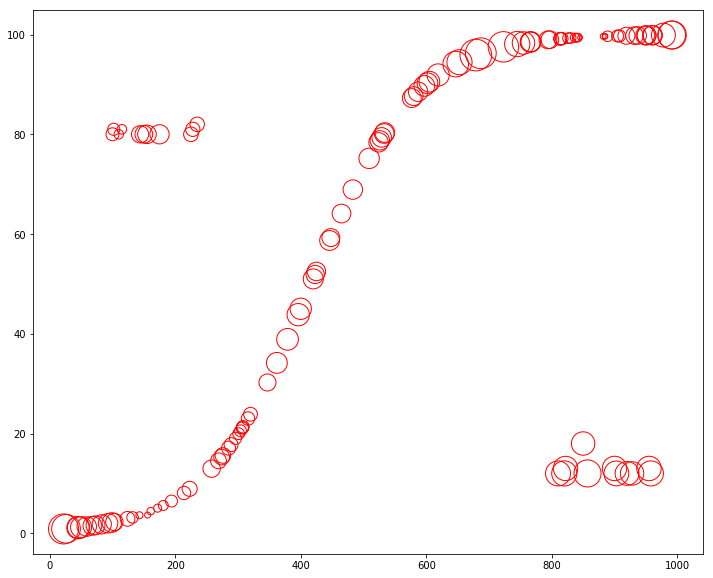

In [15]:
plt.figure(figsize=(12, 10))

plt.scatter(student_scores['Hours Studied'], 
            student_scores['Score Obtained'],
            s=1000 * radius, 
            edgecolors='r',
            facecolors='none', 
            label='Outlier scores')

plt.show()

# The size / diameter of the circle represents the degere of abnormality for a point
# Large circles are abnormal Data

### 2. IsolationForest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

The ensemble.IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature, and thus building a tree structure.

This Algorithm uses a `Randam Forest` and `Decision Trees` to detect Outliers

In [16]:
from sklearn.ensemble import IsolationForest

The number of splits to isolate any sample is the length of the path from the root to the sample in the tree -- shorter paths represents anomalies

In [17]:
isf =  IsolationForest(behaviour='new', 
                       contamination=0.19)

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
y_pred = isf.fit_predict(X)

y_pred

# `1` indicates inline Data and `-1` indicates Outlier data points

array([-1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1, -1, -1])

In [25]:
n_outliers = (y_pred == -1).sum()
n_outliers

23

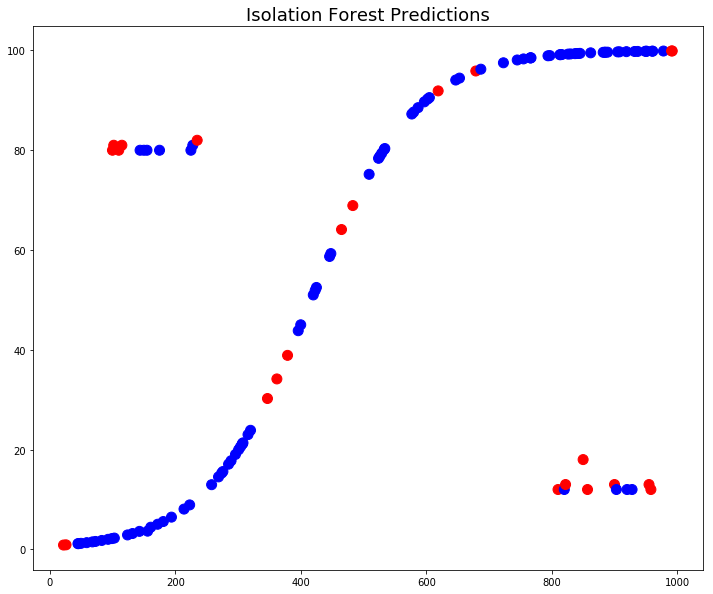

In [26]:
colors = np.array(['r', 'b'])

plt.figure(figsize=(12, 10))

plt.title('Isolation Forest Predictions', size=18)

plt.scatter(student_scores['Hours Studied'], 
            student_scores['Score Obtained'], 
            s=100, 
            color=colors[(y_pred + 1) // 2])


plt.show()

### Ploting Inliers and Outliers

In [27]:
student_scores.describe()

,Hours Studied,Score Obtained
count,122.000000,122.000000
mean,519.131148,56.665412
std,316.030884,39.929084
min,22.000000,0.869736
25%,225.750000,13.000000
50%,525.000000,78.582806
75%,829.000000,98.510907
max,992.000000,99.899724


#### Build a Meshgrid to cover the range of values

In [28]:
xx, yy = np.meshgrid(np.linspace(0, 1010, 500),
                     np.linspace(0, 102, 500))

print('xx = ', xx.ravel())
print('yy = ', yy.ravel())

xx =  [   0.            2.0240481     4.04809619 ... 1005.95190381 1007.9759519
 1010.        ]
yy =  [  0.   0.   0. ... 102. 102. 102.]


#### Concatenate the arrays with np.c_

In [29]:
np.c_[xx.ravel(), yy.ravel()]

array([[   0.        ,    0.        ],
       [   2.0240481 ,    0.        ],
       [   4.04809619,    0.        ],
       ...,
       [1005.95190381,  102.        ],
       [1007.9759519 ,  102.        ],
       [1010.        ,  102.        ]])

In [30]:
Z = isf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Z

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

##### Decision boundary in black


The points that lye within the boundary are `inliers` while those outside the boundary are `outliers`

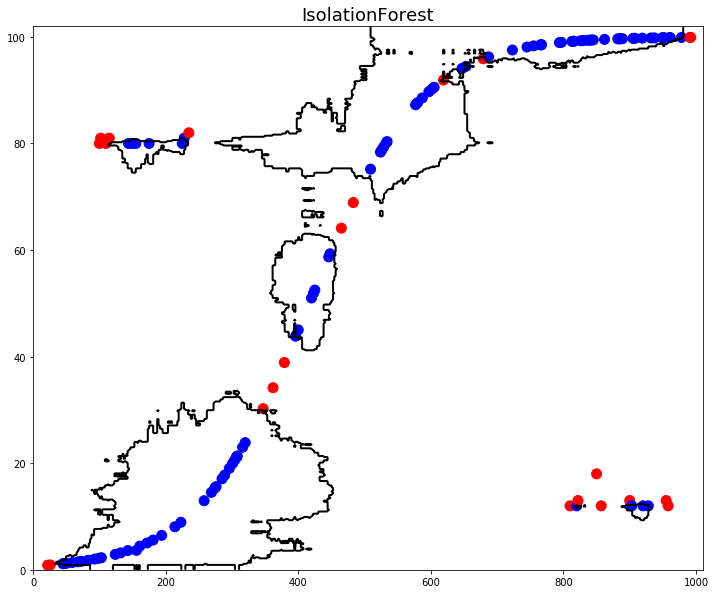

In [31]:
plt.figure(figsize=(12, 10))

plt.title('IsolationForest', size=18)

plt.scatter(student_scores['Hours Studied'], 
            student_scores['Score Obtained'], 
            s=100, 
            color=colors[(y_pred + 1) // 2])

plt.contour(xx, yy, Z, 
            levels=[0], 
            linewidths=2, 
            colors='black')

plt.show()

### 3. EllipticEnvelope
https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html

The scikit-learn provides an object covariance.EllipticEnvelope that fits a robust covariance estimate to the data, and thus fits an ellipse to the central data points, ignoring points outside the central mode.

Assumes that the Data comes from a Gauissian distribution - use this to define the shape of the data, points far away from the fit shape are `Outliers`

In [32]:
from sklearn.covariance import EllipticEnvelope

This algorithm fits a Robust covariance estimate to the data, and thus fits an ellipse to the central points - points outside the ellipse are `Outliers`

* Covaraince estimate is simply a measure of the relationship that exists between variables

* The Support_fraction is the proportion of points to be included in the raw MCD estimate

In [33]:
ee = EllipticEnvelope(support_fraction=1., contamination=0.19)

In [34]:
y_pred = ee.fit_predict(X)

y_pred

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1])

`1` indicates inliers data while `-1` indicates Outliers data

In [35]:
n_outliers = (y_pred == -1).sum()
n_outliers

23

### Ploting Inliers and outliers
##### Decision boundary in black

In [36]:
xx, yy = np.meshgrid(np.linspace(0, 1010, 500),
                     np.linspace(-5, 120, 500))

Z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

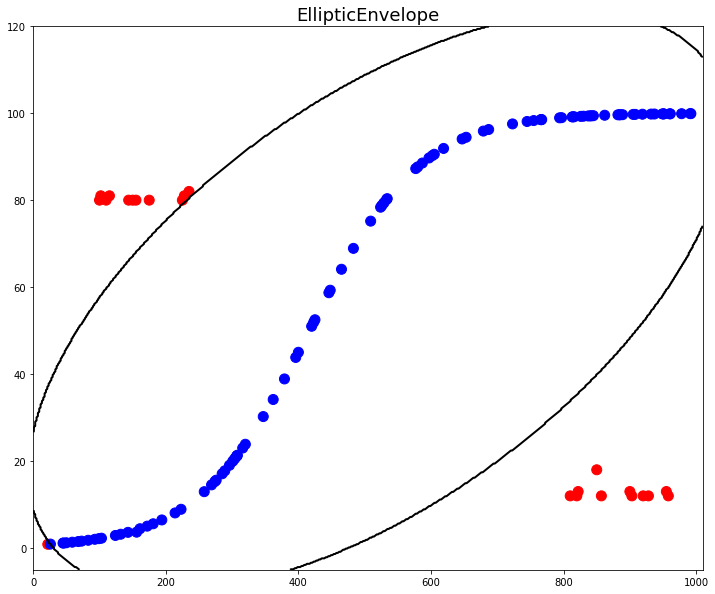

In [37]:
plt.figure(figsize=(12, 10))

plt.title('EllipticEnvelope', size=18)

plt.scatter(student_scores['Hours Studied'], 
            student_scores['Score Obtained'], 
            s=100, 
            color=colors[(y_pred + 1) // 2])

plt.contour(xx, yy, Z, 
            levels=[0], 
            linewidths=2, 
            colors='black')

plt.show()

# Novelty Detection
https://scikit-learn.org/stable/modules/outlier_detection.html

The training and test columns have been added to the previous dataset to determine whether a particular data point is a part of training set or a test set

In [38]:
scores_dataset = pd.read_csv('datasets/student_performance_modified.csv')

scores_dataset.sample(10)

,Hours Studied,Score Obtained,Outliers,Training,Test
43,307,21.148456,False,1,0
58,483,68.911819,False,0,1
114,951,99.836095,False,0,1
66,580,87.653295,False,0,1
39,296,19.030956,False,1,0
111,937,99.806169,False,1,0
59,509,75.175606,False,1,0
64,534,80.345030,False,0,1
6,68,1.500874,False,0,1
1,26,0.912112,False,1,0


In [39]:
scores_dataset.shape

(122, 5)

In [40]:
x_training = scores_dataset.loc[scores_dataset['Training']==1]

x_training.head()

,Hours Studied,Score Obtained,Outliers,Training,Test
1,26,0.912112,False,1,0
3,46,1.156660,False,1,0
5,59,1.349299,False,1,0
7,73,1.592205,False,1,0
9,93,2.015385,False,1,0


In [41]:
x_training.shape

(50, 5)

In [42]:
x_training = x_training.drop(['Outliers', 'Training', 'Test'], axis=1)

x_training.head()

,Hours Studied,Score Obtained
1,26,0.912112
3,46,1.156660
5,59,1.349299
7,73,1.592205
9,93,2.015385


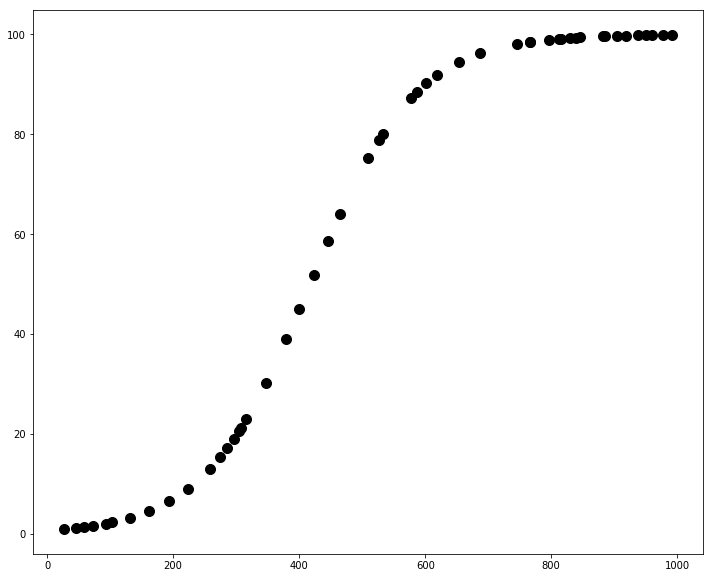

In [43]:
plt.figure(figsize=(12, 10))

plt.scatter(x_training['Hours Studied'], 
            x_training['Score Obtained'], 
            s=100, 
            c='black')

plt.show()

In [44]:
x_testing = scores_dataset.loc[scores_dataset['Test']==1]

x_testing = x_testing.drop(['Outliers', 'Training', 'Test'], axis=1)

x_testing.head()

,Hours Studied,Score Obtained
0,22,0.869736
2,45,1.143020
4,50,1.212843
6,68,1.500874
8,83,1.791570


In [45]:
x_testing.shape

(72, 2)

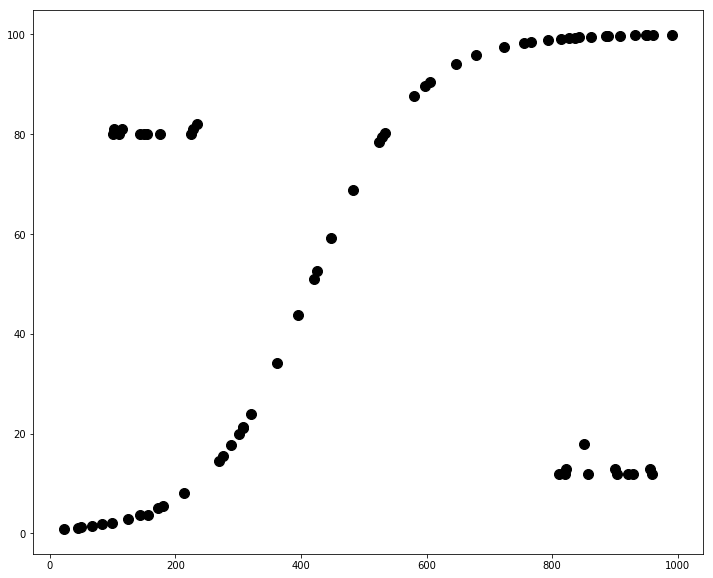

In [46]:
plt.figure(figsize=(12, 10))

plt.scatter(x_testing['Hours Studied'], 
            x_testing['Score Obtained'], 
            s=100, 
            c='black')

plt.show()

### LocalOutlierFactor
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor

#### Novelty detection using LOF

- Use only on new features not present in the training dataset
- fit(), predict(), decision_function() methods are now available

Here we are taking contamination as auto and its detecting that there are 14 outliers are there but the actual number is 22

In [47]:
lof_novelty = LocalOutlierFactor(n_neighbors=5, 
                                 contamination='auto', 
                                 novelty=True)

lof_novelty.fit(x_training)

y_pred = lof_novelty.predict(x_testing)  # Should be called on unseen Data
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1])

In [48]:
n_outliers = (y_pred == -1).sum()
n_outliers

14

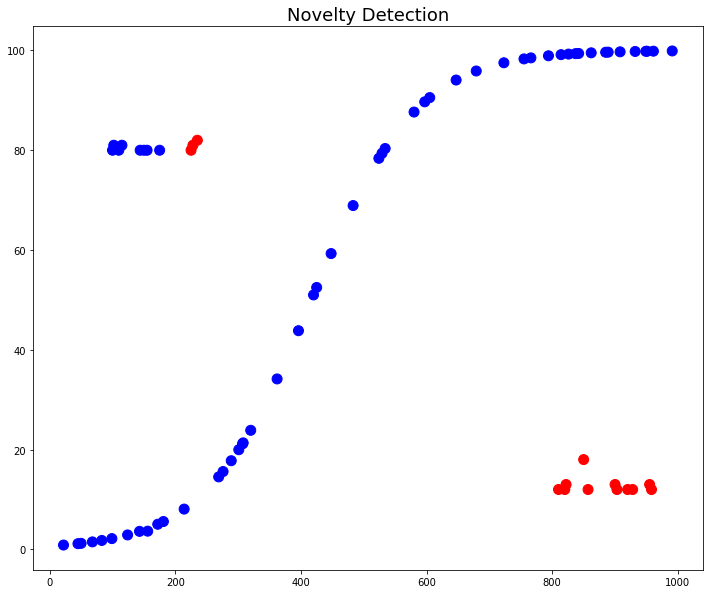

In [49]:
plt.figure(figsize=(12, 10))

plt.title('Novelty Detection', size=18)

plt.scatter(x_testing['Hours Studied'], 
            x_testing['Score Obtained'], 
            s=100, 
            color=colors[(y_pred + 1) // 2])

plt.show()

Now we will set contamination=0.01 and this time it will predict correct no of outliers i.e. 22

In [50]:
lof_novelty = LocalOutlierFactor(n_neighbors=5, 
                                 contamination=0.01, 
                                 novelty=True)
lof_novelty.fit(x_training)

y_pred = lof_novelty.predict(x_testing)
y_pred

array([ 1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1])

In [51]:
n_outliers = (y_pred == -1).sum()
n_outliers

22

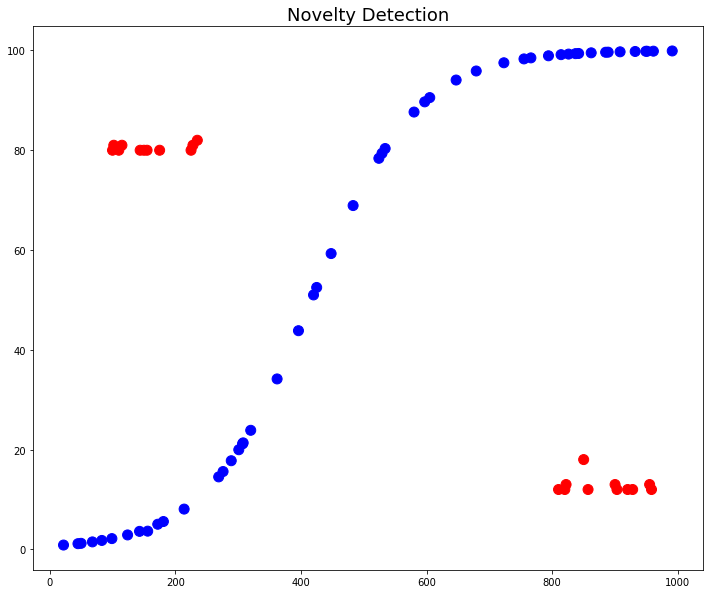

In [52]:
plt.figure(figsize=(12, 10))

plt.title('Novelty Detection', size=18)

plt.scatter(x_testing['Hours Studied'], 
            x_testing['Score Obtained'], 
            s=100, 
            color=colors[(y_pred + 1) // 2])

plt.show()

In [53]:
INLIER = np.array([[500, 99]])
OUTLIER = np.array([[10000, 40000]])

### LOF novelty detection

In [54]:
lof_novelty.predict(INLIER), lof_novelty.predict(OUTLIER)

(array([1]), array([-1]))

The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.

In [55]:
lof_novelty.score_samples(INLIER), lof_novelty.score_samples(OUTLIER)

(array([-1.01386409]), array([-818.57692939]))

The decision_function method is also defined from the scoring function, in such a way that negative values are outliers and non-negative ones are inliers

In [56]:
lof_novelty.decision_function(INLIER), lof_novelty.decision_function(OUTLIER)

(array([0.39025402]), array([-817.17281128]))

### Isolation Forest novelty detection

In [57]:
isf.predict(INLIER), isf.predict(OUTLIER)

(array([-1]), array([-1]))

The anomaly score of an input sample is computed as the mean anomaly score of the trees in the forest.

The measure of normality of an observation given a tree is the depth of the leaf containing this observation, which is equivalent to the number of splittings required to isolate this point. 

In [58]:
isf.score_samples(INLIER), isf.score_samples(OUTLIER)

(array([-0.54417871]), array([-0.55260938]))

The anomaly score of an input sample is computed as the mean anomaly score of the trees in the forest.

The measure of normality of an observation given a tree is the depth of the leaf containing this observation, which is equivalent to the number of splittings required to isolate this point.

In [59]:
isf.decision_function(INLIER), isf.decision_function(OUTLIER)

(array([-0.00304403]), array([-0.0114747]))

### EllipticEnvelope novelty detection

In [60]:
ee.predict(INLIER), ee.predict(OUTLIER)

(array([1]), array([-1]))

Compute the negative Mahalanobis distances.

In [61]:
ee.score_samples(INLIER), ee.score_samples(OUTLIER)

(array([-1.87453537]), array([-1503979.60043687]))

Decision function of the samples. It is equal to the shifted Mahalanobis distances. The threshold for being an outlier is 0, which ensures a compatibility with other outlier detection algorithms.

In [62]:
ee.decision_function(INLIER), ee.decision_function(OUTLIER)

(array([0.92463624]), array([-1503976.80126526]))